In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("../../completed/df_stats.csv", index_col=0)

## 2.1 Analisi Statistica e Regressione (Inference)



In questa parte, l'attenzione è posta sulla significatività statistica e sull'interpretazione dei coefficienti. Non stiamo ancora cercando di fare la "miglior predizione possibile", ma di capire come le variabili si influenzano a vicenda.

**Selezione delle variabili**  
Come sappiamo il **target** è Price, e il resto sono i nostri **predittori**. Naturalmente cercheremo di investigare sulla significatività statistica di ogni coefficiente, e quindi potremmo dover cambiare alcune scelte.

Applichiamo utilizzando la libreria **statsModels** il nostro modello di **Regressione Lineare.**

In [3]:
y_inference = df['Price']

vars_da_escludere = ['Price'] 
X_inference = df.drop(columns=vars_da_escludere)

X_inference = sm.add_constant(X_inference)

modello = sm.OLS(y_inference, X_inference).fit()

print(modello.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     2171.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:15:53   Log-Likelihood:                 1362.4
No. Observations:                5710   AIC:                            -2651.
Df Residuals:                    5673   BIC:                            -2405.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8504    

**1. Analisi della Bontà di Adattamento (R-squared)**  
R-squared (0.932): Il modello spiega il 93.2% della varianza totale dei prezzi. Questo indica un adattamento eccellente ai dati.  
Prob (F-statistic) (0.00): Indica che il modello nel suo complesso è statisticamente significativo (non è un risultato casuale).  
Adj. R-squared (0.932): È identico all'R-squared semplice. Significa che non abbiamo "gonfiato" il modello con variabili inutili (spazzatura). Tutte le variabili aggiunte portano informazione.

**2. Diagnostica: Il problema della Multicollinearità**  
Nelle note:  
The condition number is large, 1.64e+03. This might indicate that there are strong multicollinearity...

Avevamo ragione a temere Engine + Power. Il numero è alto, il che significa che le due variabili "litigano" un po'. Tuttavia, guardando i P-value, entrambe sono rimaste significative (0.000) e hanno coefficienti positivi.  
**Interpretazione**: Nonostante la collinearità, il modello beneficia dell'inclusione di entrambe le variabili per massimizzare la precisione (R2), sebbene l'interpretazione dei singoli coefficienti di potenza e cilindrata vada fatta con cautela.  

**3. Interpretazione dei Coefficienti**  
- Variabili di Usura (Age, Km)  
Age (Coef: -0.0962):  
Mantenendo costanti le altre variabili, ogni anno di invecchiamento dell'auto è associato a una riduzione del prezzo di circa il 9.6%. Questo rispecchia fedelmente il deprezzamento annuale di mercato.  
Kilometers_Driven (Coef: -0.0717):  
L'usura chilometrica ha un impatto negativo significativo: all'aumentare dei chilometri, il valore diminuisce.  

- Variabili di Performance (Power, Engine)  
Power (Coef: 0.6838):  
La potenza è il predittore positivo più forte. Un motore più potente è associato drasticamente a un prezzo più alto.  

- Variabili Categoriche (Brand e Trasmissione)
Le variabili Dummy funzionano per confronto con una base. Quale Brand manca nella lista? Audi. Quindi tutti i numeri sono rispetto ad un'Audi:  
Brand_BMW (P-value 0.201, Coef -0.02):  
Il coefficiente non è statisticamente significativo (P > 0.05). Questo significa che, a parità di età e potenza, non c'è differenza di prezzo statistica tra una BMW e un'Audi (il brand di riferimento). Il mercato le valuta uguali.  
Brand_Maruti (Coef: -0.4893):  
Il coefficiente è negativo e significativo. Rispetto al brand di riferimento (Audi), una Maruti vale circa il 49% in meno a parità di altre caratteristiche.  
Transmission (Coef: 0.0745):
Passare dal cambio Manuale (0) all'Automatico (1) comporta un incremento di prezzo del 7.5% circa, confermando il valore aggiunto della trasmissione automatica.  

**4. Analisi dei P-Value**  
Promossi (Significativi, P < 0.05): Age, Km, Fuel, Transmission, Power, Engine, Seats e la maggior parte dei Brand economici (Maruti, Hyundai, ecc.). Queste variabili devono restare nel modello.  

Bocciati o Neutri (Non Significativi, P > 0.05):  
Brand_BMW (0.201), Brand_Mercedes-Benz (0.328), Location_Jaipur, Chennai, Kochi.  
Significato: Questo non vuol dire che "non contano", ma che non sono diverse dalla media o dal riferimento (Audi). E inoltre ha senso che BMW e Mercedes siano simili ad Audi.

**5. Analisi degli Intervalli di Confidenza ([0.025 0.975])**  
Diamo una visione generale su quelli più rilevanti:  
Guardiamo la riga di Age:  
Coefficiente stimato: -0.0962. Intervallo: [-0.099, -0.094].  
Commento: L'intervallo è strettissimo (i due numeri sono vicinissimi). Questo indica una grandissima precisione della stima. Siamo estremamente certi che il deprezzamento annuo sia tra il 9.4% e il 9.9%.  
Guardiamo la riga di Brand_BMW:  
Intervallo: [-0.057, 0.012].  
Commento: L'intervallo contiene lo zero (va da negativo a positivo). Ecco perché il P-value è alto, non siamo sicuri se il brand BMW aggiunga o tolga valore rispetto alla base. Statisticamente, l'effetto è nullo.  
Power: L'intervallo è [0.645, 0.723].  
Interpretazione: Anche per la potenza la stima è solida. L'effetto positivo sul prezzo è netto e ben definito.  

La maggior parte degli intervalli di confidenza sono ristretti e non includono lo zero, il che indica che le stime dei coefficienti sono precise e affidabili. Le uniche eccezioni, riguardano brand di lusso comparabili al riferimento o location specifiche, dove l'effetto prezzo è statisticamente trascurabile.

## 2.2 Analisi Predittiva e Machine Learning

### 2.2.1 Definizione del Problema e del Valore Pratico

**Titolo del Progetto**: Algoritmo di Pricing per il mercato delle automobili ("AutoPrice AI").

**1. Scenario Applicativo**  
Immaginiamo di integrare questo modello predittivo all'interno di una piattaforma web di compravendita auto o nel gestionale interno di una grande concessionaria di auto usate. Quando un utente inserisce i dati tecnici di una vettura, il sistema utilizza l'algoritmo di **Machine Learning** per calcolare in tempo reale il **Price** dell'auto, senza intervento umano.

**2. Utilità del Problema (Perché risolverlo?)**  
Il mercato delle auto usate soffre di una forte asimmetria informativa:  
- Chi vende spesso non sa quanto vale la sua auto: rischia di svenderla o di proporla a un prezzo fuori mercato.  
- Chi compra ha paura di pagare troppo o di essere truffato.  
- Può essere utile per i concessionari, per stabilire un prezzo che è più basato sul mercato corrente.  
Questo strumento risolve il problema fornendo una valutazione oggettiva, immediata e basata sui dati reali di migliaia di transazioni simili, aggiungendo certezze al soggetto interessato. 

**3. Quantificazione del Valore Aggiunto**  
L'implementazione di questo modello porterebbe vantaggi tangibili:  
- Risparmio tempo: Riduzione del tempo di valutazione da 20-30 minuti (ricerca manuale) a < 1 secondo. Per una concessionaria che valuta molteplici auto al mese, questo equivale a risparmiare moltissimo.  
- Incremento del profitto: Evitando errori di sovrastima nell'acquisto di auto usate, il concessionario protegge il proprio margine di profitto.    
- Fiducia del cliente: Una piattaforma online che mostra un "Prezzo Consigliato dall'AI" aumenta la trasparenza, incrementando la probabilità di contatto tra venditore e acquirente.

Data la natura del nostro contesto (pricing), si è scelto di mantenere l'approccio di Regressione per predire il valore dell'auto, in quanto abbiamo già ricevuto dei risultati eccellenti. 

### 2.2.2 Setup Sperimentale

**1. Preparazione e Data Splitting**  
Dividiamo i dati in Training Set (80%) e Test Set (20%).  
*Nota*: La validazione la faremo dopo usando la Cross-Validation automatica dentro i modelli, quindi per ora ci basta dividere in due (Train/Test).

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X = df.drop(columns=['Price']) 

y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensioni Training Set: {X_train.shape}")
print(f"Dimensioni Test Set:     {X_test.shape}")

Dimensioni Training Set: (4568, 36)
Dimensioni Test Set:     (1142, 36)


**2. Preprocessing per ML (Scaling)**  
Qui applichiamo lo StandardScaler.

In [6]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_final.head()

,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_BMW,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0.207501,0.622293,-0.923658,1.550443,-0.433436,-0.221204,0.753583,1.263859,-0.357044,-0.214539,...,-0.248163,-0.291609,2.862018,-0.32689,-0.369596,-0.269355,-0.352944,-0.321116,-0.39072,-0.324423
1,-0.808795,-1.089762,1.082652,-0.644977,-0.433436,0.751562,-0.743476,-0.551891,-0.357044,-0.214539,...,-0.248163,-0.291609,-0.349404,3.05913,-0.369596,-0.269355,-0.352944,-0.321116,-0.39072,-0.324423
2,-0.131264,-0.184139,1.082652,1.550443,-0.433436,-1.923545,0.478176,1.017559,-0.357044,-0.214539,...,-0.248163,-0.291609,-0.349404,3.05913,-0.369596,-0.269355,-0.352944,-0.321116,-0.39072,-0.324423
3,0.546266,-0.139732,-0.923658,-0.644977,-0.433436,0.508370,-0.274000,-1.039218,-0.357044,-0.214539,...,-0.248163,-0.291609,-0.349404,-0.32689,-0.369596,-0.269355,-0.352944,3.114144,-0.39072,-0.324423
4,-0.131264,0.309645,1.082652,1.550443,-0.433436,-0.464396,-0.070147,0.306023,-0.357044,-0.214539,...,-0.248163,-0.291609,-0.349404,-0.32689,-0.369596,-0.269355,2.833314,-0.321116,-0.39072,-0.324423


### 2.2.3 Modellazione e Selezione

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [8]:
# --- MODELLO 1: Linear Regression emplice
lin_reg = LinearRegression()
# Qui non c'è grid search perché non ha iperparametri da regolare
lin_reg.fit(X_train_final, y_train)
score_lin = lin_reg.score(X_test_final, y_test)
print(f"1. Linear Regression R2: {score_lin:.4f}")


# --- MODELLO 2: Ridge Regression (Per gestire la collinearità Engine/Power) ---
# Usiamo GridSearch per trovare l'alpha giusto
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_final, y_train)

print(f"\n2. Ridge Regression Best R2 (CV): {ridge_grid.best_score_:.4f}")
print(f"   Miglior alpha: {ridge_grid.best_params_}\n")


# --- MODELLO 3: Polynomial Regression
# Creiamo una Pipeline: Prima crea i quadrati delle variabili poi fa la Regressione Ridge
# Usiamo Ridge dentro la polinomiale per evitare che i coefficienti esplodano

poly_pipeline = make_pipeline(PolynomialFeatures(degree=2), Ridge())

# Cerchiamo l'alpha anche qui
poly_params = {'ridge__alpha': [1, 10, 100]}
poly_grid = GridSearchCV(poly_pipeline, poly_params, cv=5, scoring='r2')

poly_grid.fit(X_train_final, y_train)

print(f"3. Polynomial Regression Best R2 (CV): {poly_grid.best_score_:.4f}")
print(f"   Miglior alpha per la Polynomial: {poly_grid.best_params_}")

1. Linear Regression R2: 0.9429

2. Ridge Regression Best R2 (CV): 0.9277
   Miglior alpha: {'alpha': 1}

3. Polynomial Regression Best R2 (CV): 0.9381
   Miglior alpha per la Polynomial: {'ridge__alpha': 100}


**Scelta degli Algoritmi**:  

Regressione Lineare: Utilizzata come base di riferimento per valutare le performance minime accettabili.  

Ridge Regression: Selezionata specificamente per gestire la multicollinearità rilevata nell'analisi esplorativa (tra Engine e Power). La regolarizzazione L2 penalizza i coefficienti troppo alti, riducendo la varianza del modello senza eliminare variabili.  

Regressione Polinomiale (Grado 2): Introdotta per catturare possibili le relazioni non lineari, nonostante le trasformazioni logaritmiche, osservate nei grafici (es. la crescita esponenziale del prezzo rispetto alla potenza).

### 2.2.4 Valutazione e Confronto

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
models_to_evaluate = {
    "Linear Regression": lin_reg,
    "Ridge Regression": ridge_grid.best_estimator_,
    "Polynomial Regression (Deg 2)": poly_grid.best_estimator_
}

results_list = []

print("--- VALUTAZIONE SUL TEST SET")

for name, model in models_to_evaluate.items():
    y_pred_test = model.predict(X_test_final)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # Salva i risultati
    results_list.append({
        "Model": name,
        "R2 Score": r2,
        "RMSE (Log Scale)": rmse,
        "MAE (Log Scale)": mae
    })

# Crea la classifica finale
df_results = pd.DataFrame(results_list).sort_values(by='R2 Score', ascending=False)
print(df_results)

--- VALUTAZIONE SUL TEST SET
                           Model  R2 Score  RMSE (Log Scale)  MAE (Log Scale)
2  Polynomial Regression (Deg 2)  0.956100          0.158417         0.118733
1               Ridge Regression  0.942901          0.180668         0.139884
0              Linear Regression  0.942900          0.180671         0.139885


**Confronto Critico**  
- Best Model: Regressione Polinomiale (Grado 2). È il modello indiscusso, raggiungendo un $R^2$ Score di 0.956 e un RMSE di 0.158 sul Test Set. Questo miglioramento netto rispetto ai modelli lineari dimostra che la relazione tra le caratteristiche e il Price non è puramente lineare, ma presenta curvature che solo il modello polinomiale ha saputo catturare.  
- Regressione Lineare e la Ridge Regression hanno ottenuto risultati quasi identici ($R^2 \approx 0.943$). La GridSearch per la Ridge ha selezionato un parametro di penalizzazione molto basso ($\alpha=1$), indicando che il modello non necessitava di una forte regolarizzazione per performare bene. Tuttavia, la Ridge rimane preferibile per la sua capacità teorica di gestire meglio la multicollinearità.  
- È interessante notare che le performance sul Test Set ($0.94-0.95$) sono risultate leggermente superiori a quelle stimate in Cross-Validation ($0.92-0.94$). Questo fenomeno esclude problemi di Overfitting e conferma che il modello è in grado di generalizzare eccellentemente su nuovi dati mai visti.

## 2.3 Conclusioni Parziali

**1. Le principali relazioni statistiche scoperte**  
L'analisi inferenziale ha confermato la validità delle teorie economiche sul deprezzamento e ha quantificato l'impatto delle features.
- È stata trovata una relazione negativa forte e precisa. A parità di altre condizioni, ogni anno di età riduce il valore dell'auto di circa il 9.6%.
- La Potenza (Power) è risultata essere il predittore positivo più influente. L'analisi ha evidenziato che il mercato premia la performance in modo non-lineare.
- La trasmissione Automatica offre un incremento di valore netto stimato intorno al 7.5% rispetto alla manuale.
- Brands: I coefficienti delle variabili dummy hanno delineato una chiara gerarchia di mercato. I brand più economici mostrano valutazioni inferiori del 45-50% rispetto ai brand più costosi (Audi), mentre non vi è evidenza statistica significativa di differenze di prezzo tra i giganti del lusso (Audi, BMW, Mercedes), che il mercato percepisce come equivalenti.
**2. Performance del miglior modello e applicabilità**  
Per la fase predittiva sono stati confrontati modelli lineari (OLS, Ridge) e non lineari.
- La Regressione Polinomiale di Grado 2 (con regolarizzazione Ridge) ha superato tutti gli altri algoritmi, raggiungendo un $R^2$ Score di 0.956 sul Test Set. Il modello è in grado di spiegare il 95.6% della varianza dei prezzi. L'errore medio (RMSE) di 0.158 indica un margine di errore percentuale medio intorno al 15-16%, un risultato eccellente.
- Applicabilità nello scenario ipotizzato: Il modello sviluppato è pronto per essere integrato in una piattaforma per concessionari o portali web. Il modello permette in tempo reale risultati oggettivi basati sui dati storici, riducendo drasticamente i tempi d'attesa.

# 3. Unsupervised Learning

## 3.1 Riduzione della Dimensionalità e Visualizzazione (PCA)

Abbiamo deciso di provare questa tecnica per due ragioni:
- Molte variabili dummy: (Brand, Location, Fuel), la **PCA** può "comprimerle".  
- Variabili correlate: Engine & Power. La PCA le fonderà in un'unica **Componente**, risolvendo la multicollinearità alla radice.

### 3.1.1 Analisi della Varianza Spiegata

In [13]:
from sklearn.decomposition import PCA

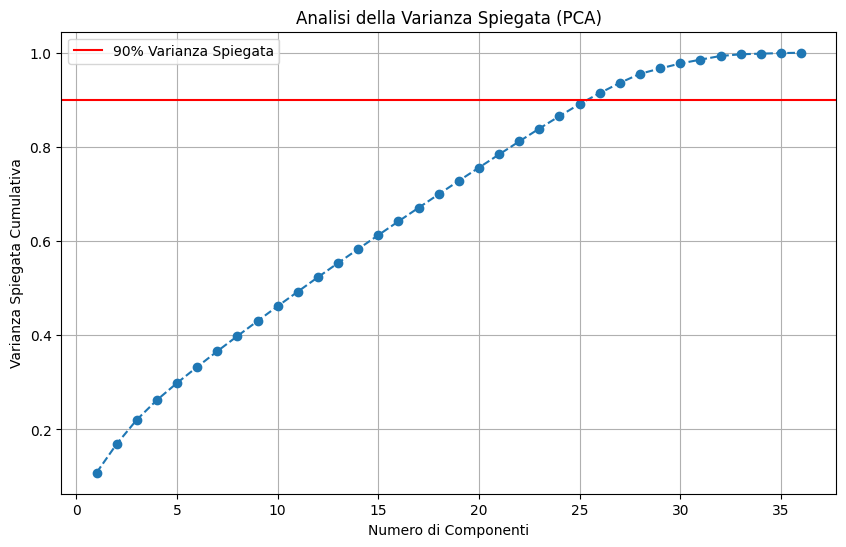

Servono 26 componenti per spiegare il 90% della varianza originale.


In [14]:
pca_full = PCA()
pca_full.fit(X_train_final)

# Calcolo della varianza spiegata cumulativa
cum_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Varianza Spiegata')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Analisi della Varianza Spiegata (PCA)')
plt.grid(True)
plt.legend()
plt.show()

# Troviamo il numero esatto di componenti per il 90%
n_components_90 = np.argmax(cum_variance >= 0.90) + 1
print(f"Servono {n_components_90} componenti per spiegare il 90% della varianza originale.")

L'analisi della varianza spiegata ha indicato che sono necessarie 26 componenti principali per conservare il 90% dell'informazione originale.

In [19]:
pca_opt = PCA(n_components=n_components_90)
X_train_pca = pca_opt.fit_transform(X_train_final)
X_test_pca = pca_opt.transform(X_test_final)

# Addestriamo una regressione lineare semplice su questi nuovi dati
reg_pca = LinearRegression()
reg_pca.fit(X_train_pca, y_train)

# Qui invece Polynomial
model_pca_poly = make_pipeline(
    PCA(n_components=26),         
    PolynomialFeatures(degree=2),  
    Ridge(alpha=100)                
)


model_pca_poly.fit(X_train_final, y_train)


score_pca_poly = model_pca_poly.score(X_test_final, y_test)

print(f"R2 Score con PCA (26 comp) + Polinomiale: {score_pca_poly:.4f}")

# Score
y_pred_pca = reg_pca.predict(X_test_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"R2 Score con PCA (26 comp) + Regr. Lineare): {r2_pca:.4f}")
print(f"R2 Score Originale (Regressione Lineare): {0.9429:.4f}")
print(f"R2 Score Originale (Polynomial): {0.9561:.4f}")

R2 Score con PCA (26 comp) + Polinomiale: 0.9377
R2 Score con PCA (26 comp) + Regr. Lineare): 0.8997
R2 Score Originale (Regressione Lineare): 0.9429
R2 Score Originale (Polynomial): 0.9561


**Analisi Critica dei Risultati**

- Applicare una semplice Regressione Lineare sulle componenti principali ha portato a un calo sensibile delle performance ($R^2$ sceso a 0.8997). Questo suggerisce che, proiettando i dati in uno spazio a dimensionalità ridotta, le relazioni lineari dirette tra variabili originali e prezzo si sono parzialmente perse.
- Il risultato più significativo è quello della PCA + Regressione Polinomiale (0.9377). Nonostante l'utilizzo di un numero ridotto di input, il modello ha recuperato quasi interamente la capacità predittiva, avvicinandosi molto al modello senza PCA (0.9561).
- **Trade-off Efficienza vs Precisione**: Il modello PCA + Polinomiale rappresenta il miglior compromesso. Accettando una perdita minima di precisione, otteniamo un modello più robusto, privo di multicollinearità e computazionalmente più leggero, avendo eliminato il rumore statistico presente nelle variabili meno significative.

### 3.1.2 Visualizzazione

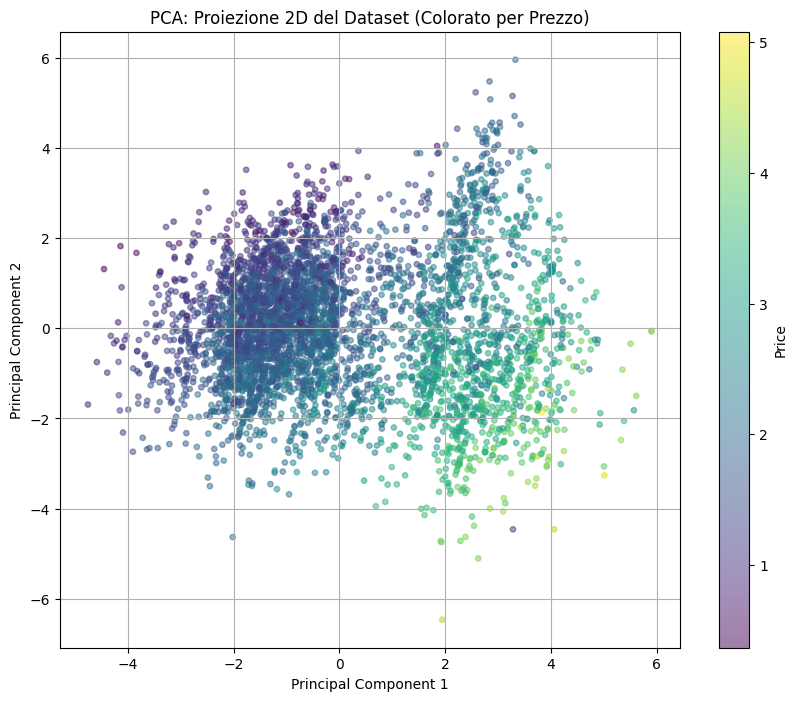

In [15]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_final)

plt.figure(figsize=(10, 8))
# Scatter plot: X=PC1, Y=PC2, Colore=Prezzo
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                      c=y_train, cmap='viridis', alpha=0.5, s=15)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Proiezione 2D del Dataset (Colorato per Prezzo)')
plt.colorbar(scatter, label='Price')
plt.grid(True)
plt.show()

Notiamo che nello spazio 2D, c'è una divisione netta. Le auto costose (punti chiari/gialli) si concentrano a destra, mentre quelle economiche (punti scuri/viola) a sinistra.

Analizziamo quali variabili pesano di più sulle prime due componenti.

In [17]:
loadings = pd.DataFrame(
    pca_2d.components_.T, 
    columns=['PC1', 'PC2'], 
    index=X_train_final.columns
)

print("- VARIABILI CHE INFLUENZANO LA PC1")
print(loadings['PC1'].sort_values(ascending=False).head(5))
print(loadings['PC1'].sort_values(ascending=False).tail(5))

print("\n- VARIABILI CHE INFLUENZANO LA PC2")
print(loadings['PC2'].sort_values(ascending=False).head(5))
print(loadings['PC2'].sort_values(ascending=False).tail(5))

- VARIABILI CHE INFLUENZANO LA PC1
Engine                 0.481004
Power                  0.452668
Transmission           0.314152
Seats                  0.211850
Brand_Mercedes-Benz    0.175680
Name: PC1, dtype: float64
Location_Kolkata   -0.070083
Brand_Hyundai      -0.134238
Fuel_Type          -0.214374
Brand_Maruti       -0.239452
Mileage            -0.368941
Name: PC1, dtype: float64

- VARIABILI CHE INFLUENZANO LA PC2
Kilometers_Driven    0.456568
Age                  0.404018
Seats                0.307533
Owner_Type           0.254787
Brand_Toyota         0.202390
Name: PC2, dtype: float64
Location_Coimbatore   -0.150613
Power                 -0.176547
Location_Kochi        -0.180024
Brand_Mercedes-Benz   -0.181988
Transmission          -0.319753
Name: PC2, dtype: float64


Visti i risultati potremmo chiamare queste due componenti così:  
- **PC1**: L'Indice di Lusso e Performance"  
Sale tantissimo con Engine, Power, Mercedes e scende con Mileage, Maruti, Hyundai.
- **PC2**: "L'Indice di Usura e Anzianità"
Sale con Kilometers_Driven, Age, Owner_Type.

## 3.2 Riorganizzazione dei Dati tramite Clustering 

### 3.2.1 Segmentazione Esplorativa

Abbiamo deciso di provare ad osservare se il dataset si segmenta in varie classi. 

In [20]:
from sklearn.cluster import KMeans

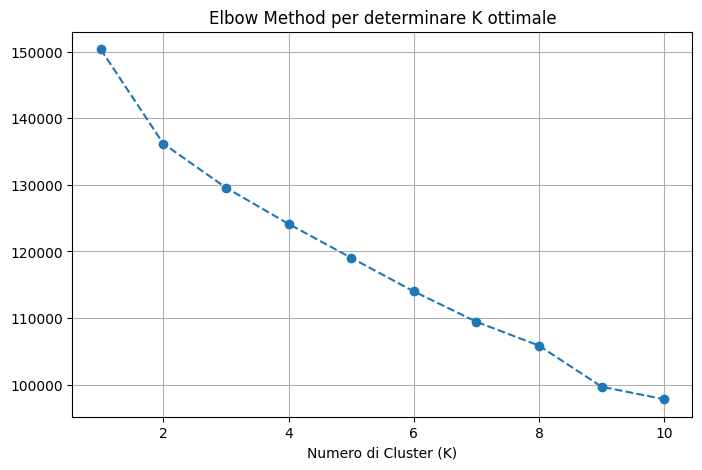

In [24]:
X_for_clustering = X_train_pca 

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_for_clustering)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Numero di Cluster (K)')
plt.title('Elbow Method per determinare K ottimale')
plt.grid(True)
plt.show()

L'analisi preliminare tramite Elbow Method ha restituito un grafico dell'inerzia con andamento decrescente quasi lineare, privo di un punto di flesso "gomito" evidente. Questo risultato indica che le osservazioni non sono distribuite in "isole" dense separate da vuoti, ma si dispongono lungo un continuum omogeneo.
Nonostante l'assenza di cluster "naturali" separati, procediamo con la segmentazione applicando K-Means con K=3. L'obiettivo in questo contesto non è la scoperta di anomalie, ma la discretizzazione del dataset. In uno scenario di business può essere fondamentale ridurre questa complessità in un numero gestibile di profili di veicolo.

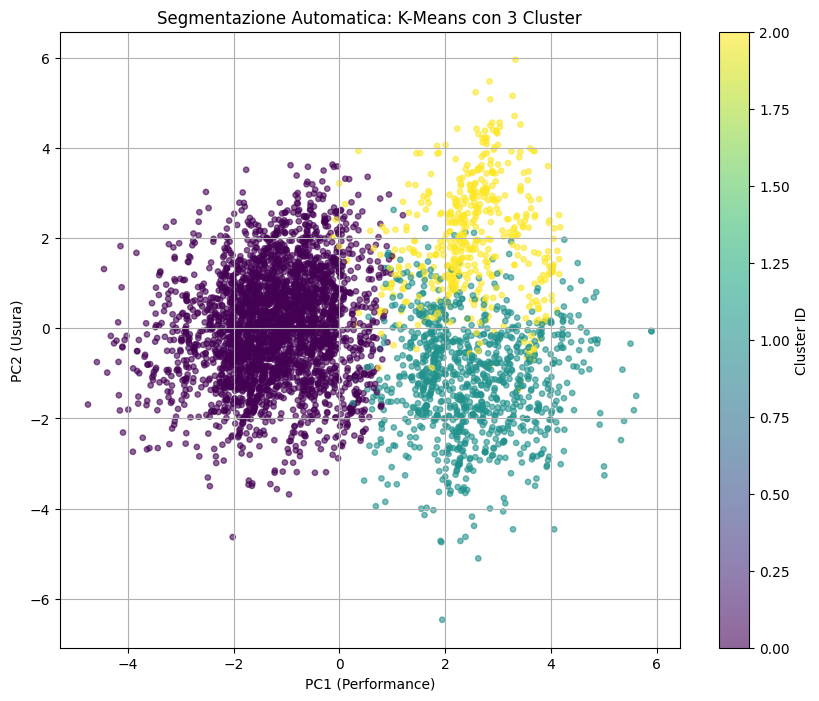

In [25]:
k_scelto = 3  
kmeans_final = KMeans(n_clusters=k_scelto, random_state=42, n_init=10)

# L'algoritmo assegna un'etichetta a ogni auto
cluster_labels = kmeans_final.fit_predict(X_train_pca)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                      c=cluster_labels, cmap='viridis', alpha=0.6, s=15)

plt.xlabel('PC1 (Performance)')
plt.ylabel('PC2 (Usura)')
plt.title(f'Segmentazione Automatica: K-Means con {k_scelto} Cluster')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()

In [26]:
df_train_analysis = X_train.copy() # Dati originali
df_train_analysis['Cluster'] = cluster_labels
df_train_analysis['Price_Real'] = np.exp(y_train) - 1 # Rimettiamo il prezzo in Lahk (da Log)

# Raggruppiamo per Cluster e vediamo le medie
profilo_cluster = df_train_analysis.groupby('Cluster')[['Price_Real', 'Power', 'Age', 'Kilometers_Driven']].mean()
profilo_cluster['Count'] = df_train_analysis['Cluster'].value_counts()

print("--- PROFILO DEI SEGMENTI DI MERCATO ---")
print(profilo_cluster.round(1))

--- PROFILO DEI SEGMENTI DI MERCATO ---
         Price_Real  Power  Age  Kilometers_Driven  Count
Cluster                                                  
0               5.0    4.4  5.3               10.7   3083
1              23.4    5.2  5.6               10.7    984
2              11.0    4.9  5.7               11.1    501


Imponendo matematicamente la divisione in 3 centroidi, l'algoritmo restituisce tre profili tecnicamente coerenti (come visibile dalla tabella delle medie):  

Gruppo 0: Auto Economy.  

Gruppo 1: Auto di Lusso.  

Gruppo 2: Auto di Fascia media.

## 3.3 Stima della Densità (Density Estimation)

In [27]:
import seaborn as sns

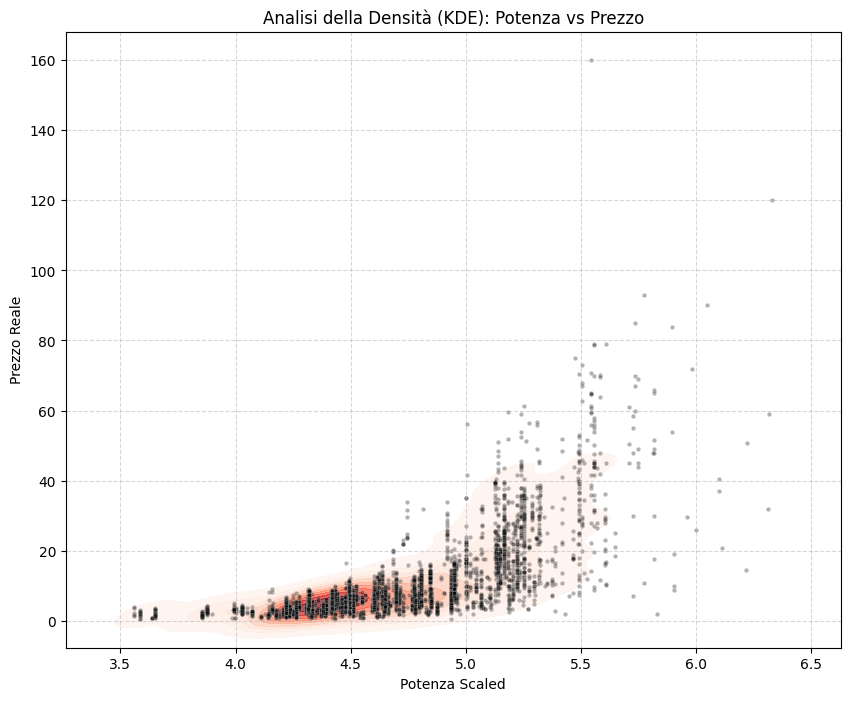

In [30]:
plt.figure(figsize=(10, 8))

# KDE Plot
sns.kdeplot(data=df_train_analysis, x='Power', y='Price_Real', 
            fill=True, cmap="Reds", thresh=0.05, alpha=0.7)

# Scatter Plot sopra per vedere i punti outlier
sns.scatterplot(data=df_train_analysis, x='Power', y='Price_Real', 
                s=10, color="black", alpha=0.3)

plt.title('Analisi della Densità (KDE): Potenza vs Prezzo')
plt.xlabel('Potenza Scaled')
plt.ylabel('Prezzo Reale')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Deduciamo alcune cose:  
- L'area rosso scuro si concentra nella fascia di potenza bassa e prezzo contenuto. Questo nucleo denso rappresenta il segmento "Economy", al Cluster 0. In quest'area, la predizione del prezzo è statisticamente più solida data l'abbondanza di esempi storici.
- **Anomaly Detection**  
Outlier di Lusso Estremo: Si notano veicoli con potenza elevata e prezzi superiori a 100/120. Questi punti rappresentano le Supercar e sebbene siano pochi, il loro impatto sull'errore quadratico medio può essere sproporzionato.  
Anomalie di Prezzo in mezzo: Sono presenti alcuni veicoli con potenza media ma prezzi molto elevati (> 60-80), slegati dal trend principale.  

Conclusione: L'analisi KDE conferma che il dataset non è omogeneo, è composto da una base densa e prevedibile e da una "coda lunga" ad alta varianza. Questo giustifica le ottime performance ottenute con la **Regressione Polinomiale**, l'unica in grado di seguire la curvatura verso l'alto della distribuzione, adattandosi sia alla stabilità del segmento economico che all'esplosività dei prezzi nel segmento lusso.